In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(56)

### Load and Explore the Dataset

In [3]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X.shape, y.shape

((1797, 64), (1797,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1297, 64), (1297,), (500, 64), (500,))

### Visualize Training Data

In [5]:
index = np.random.choice(X_train.shape[0], size=10, replace=False)
X_train_sample, y_train_sample = X_train[index], y_train[index]
X_train_sample.shape, y_train_sample.shape

((10, 64), (10,))

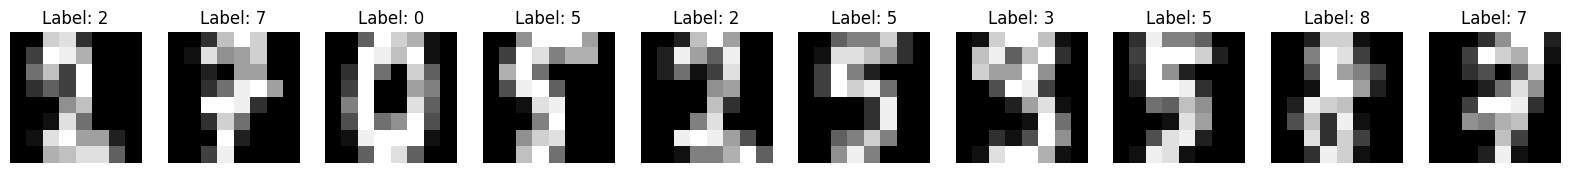

In [6]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))

for ax, data, target in zip(axs, X_train_sample, y_train_sample):
    ax.imshow(data.reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {target}")
    ax.axis("off")

plt.show()

### Implement the k-Nearest Neighbor Classifier

In [7]:
knns = {}

for i in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knns[i] = knn

knns

{1: KNeighborsClassifier(n_neighbors=1),
 3: KNeighborsClassifier(n_neighbors=3),
 5: KNeighborsClassifier(),
 7: KNeighborsClassifier(n_neighbors=7),
 9: KNeighborsClassifier(n_neighbors=9)}

### Evaluate and Compare Classifiers

In [8]:
X_train.shape

(1297, 64)

In [9]:
f1_scores = [[i, f1_score(y_train, knns[i].predict(X_train), average="weighted"), f1_score(y_test, knns[i].predict(X_test), average="weighted")] for i in knns.keys()]
df = pd.DataFrame(f1_scores, columns=["k", "F1 Score (train)", "F1 Score (test)"], index=None)
df.style.hide()

k,F1 Score (train),F1 Score (test)
1,1.000000,0.990023
3,0.991489,0.989995
5,0.989953,0.989994
7,0.992278,0.985921
9,0.988404,0.985921


The accuracy slightly decreases as the $k$ value increases for both the train and test data, showing more underfitting with higher $k$ values. This is a common tendency with KNNs as the model boundary becomes smoother and it averages more points, even from other class boundaries, with larger $k$ values. With $k=1$, only the nearest neighbor from the train data is used, but with $k=9$, the 9 nearest neighbors are used so it relies on further data points which may be across class boundaries.

### Visualize Qualitative Predictions

In [10]:
index = np.random.choice(X_test.shape[0], size=5, replace=False)
X_test_sample, y_test_sample = X_test[index], y_test[index]
X_test_sample.shape, y_test_sample.shape

((5, 64), (5,))

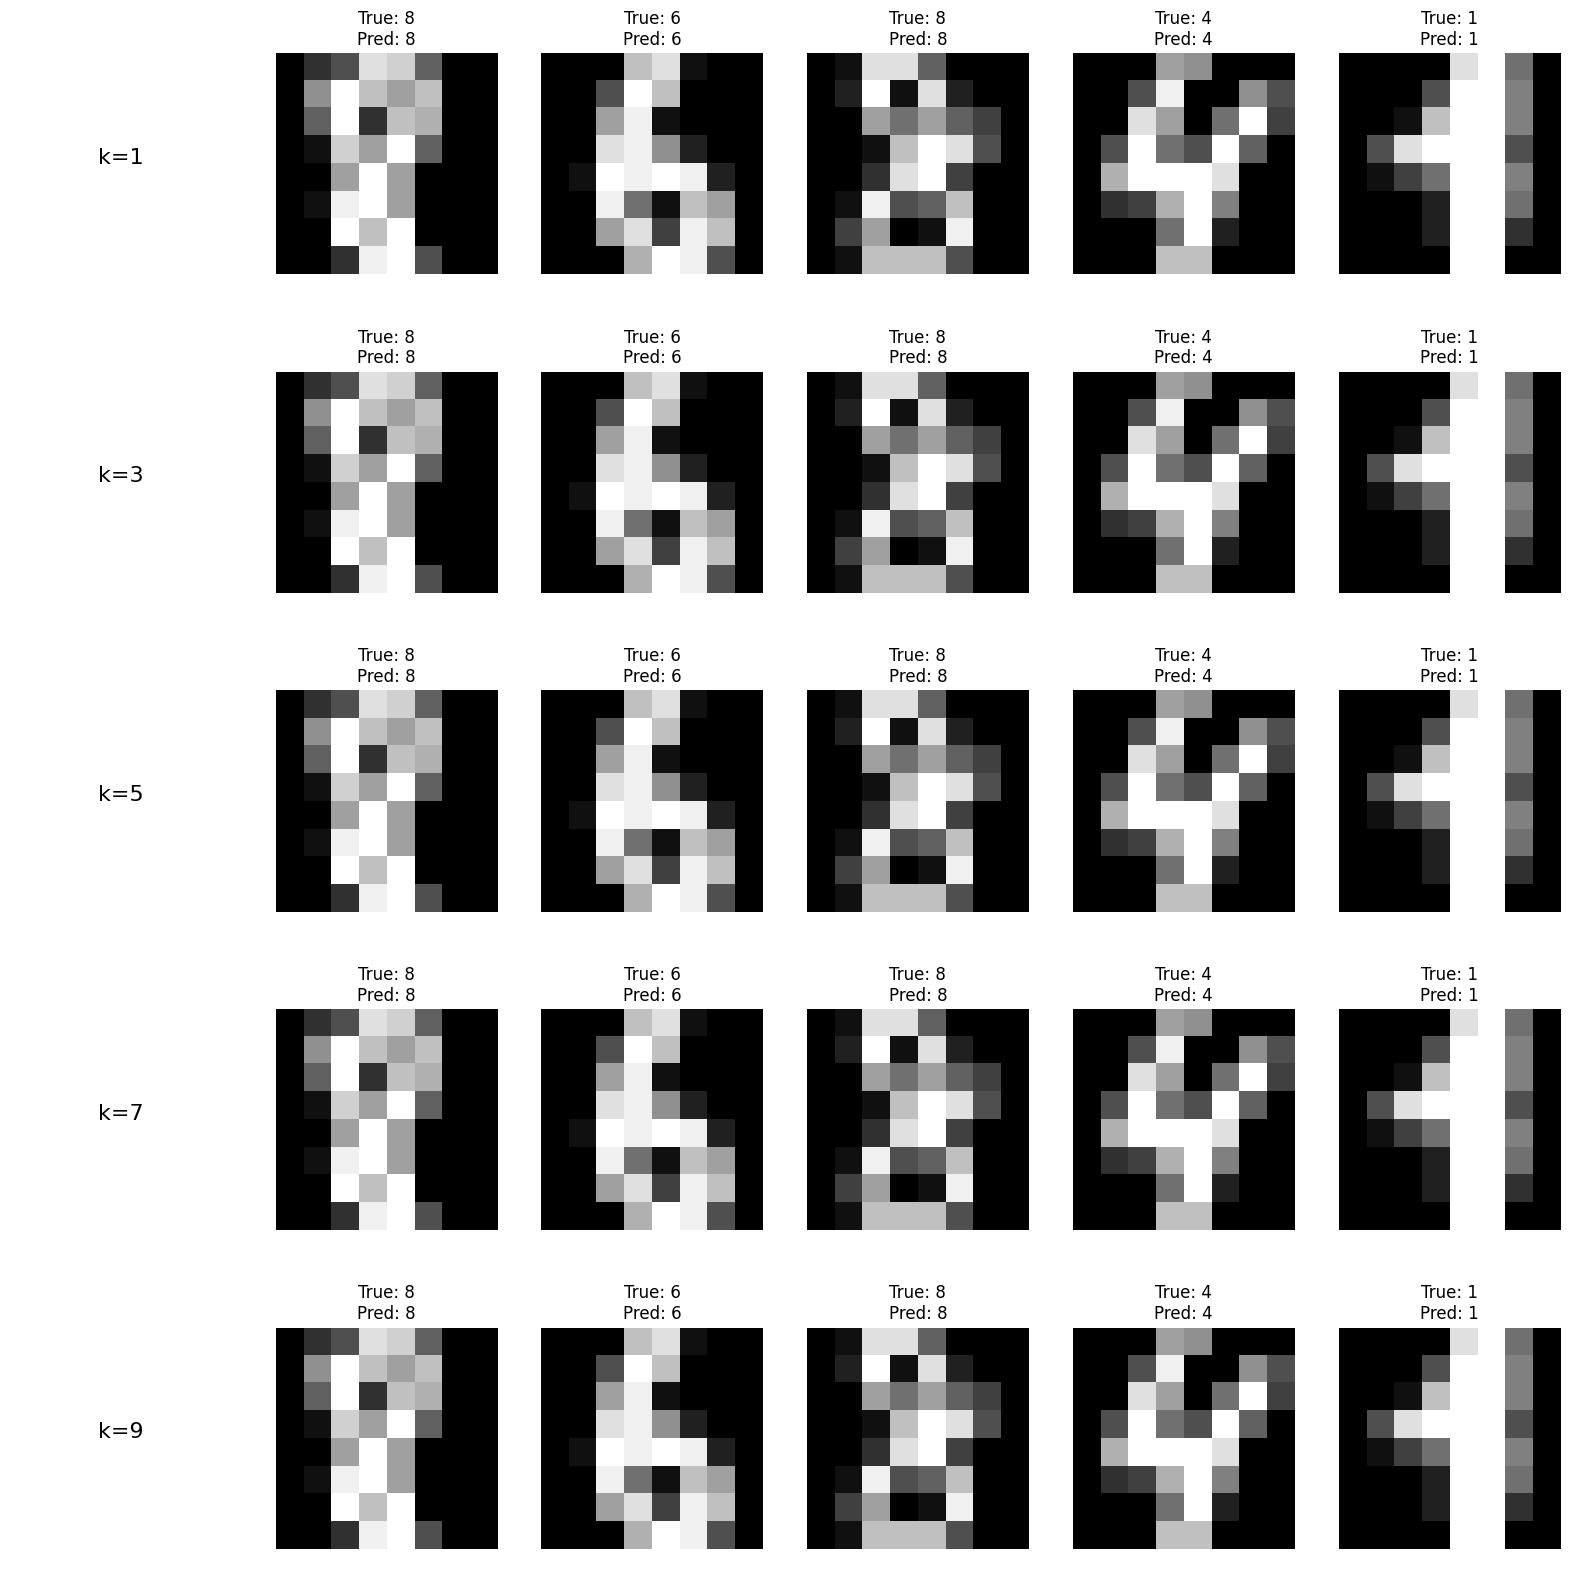

In [11]:
fig, axs = plt.subplots(5, 6, figsize=(20, 20))

for ax_row, k in zip(axs, knns.keys()):
    ax_row[0].text(0.5, 0.5, f"{k=}", horizontalalignment='center', fontsize=16)
    ax_row[0].axis("off")
    
    for ax, data, target in zip(ax_row[1:], X_test_sample, y_test_sample):
        ax.imshow(data.reshape(8, 8), cmap='gray')
        ax.set_title(f"True: {target}\nPred: {knns[k].predict(data.reshape(1, -1))[0]}")
        ax.axis("off")

plt.show()